# Experiment 1 with Sine Function

Professor Larremore suggested starting with contact modeling, and gave us the following resources:

1. https://www.cdc.gov/fluview/overview/fluview-interactive.html

2. https://cmu-delphi.github.io/delphi-epidata/

In [1]:
# trying to use the epidata API

from delphi_epidata import Epidata
# we then use Epidata to grab the info we want

In [2]:
#ex: 
res = Epidata.covidcast('fb-survey', 'smoothed_cli', 'day', 'county', [20200401, Epidata.range(20200405, 20200414)], '06001')
print(res['result'], res['message'], len(res['epidata']))

1 success 9


In [3]:
# we want to use fluview

# nat is a region label

# fetch national FluView Clinical data for epiweeks 201940 and 202001-202010 (11 weeks total)
res = Epidata.fluview(['nat'], [201940, Epidata.range(202001, 202010)])
print(res['result'], res['message'], len(res['epidata']))

1 success 11


In [4]:
print(res['epidata'])

[{'release_date': '2021-10-08', 'region': 'nat', 'issue': 202139, 'epiweek': 201940, 'lag': 104, 'num_ili': 21916, 'num_patients': 1458307, 'num_providers': 2912, 'num_age_0': 6219, 'num_age_1': 7658, 'num_age_2': None, 'num_age_3': 4827, 'num_age_4': 1764, 'num_age_5': 1448, 'wili': 1.49002, 'ili': 1.50284}, {'release_date': '2021-10-08', 'region': 'nat', 'issue': 202139, 'epiweek': 202001, 'lag': 91, 'num_ili': 88731, 'num_patients': 1426691, 'num_providers': 2970, 'num_age_0': 21594, 'num_age_1': 23392, 'num_age_2': None, 'num_age_3': 27655, 'num_age_4': 9209, 'num_age_5': 6881, 'wili': 5.90066, 'ili': 6.21936}, {'release_date': '2021-10-08', 'region': 'nat', 'issue': 202139, 'epiweek': 202002, 'lag': 90, 'num_ili': 75614, 'num_patients': 1492251, 'num_providers': 3002, 'num_age_0': 15564, 'num_age_1': 22756, 'num_age_2': None, 'num_age_3': 23634, 'num_age_4': 8196, 'num_age_5': 5464, 'wili': 4.9402, 'ili': 5.06711}, {'release_date': '2021-10-08', 'region': 'nat', 'issue': 202139, '

In [5]:
import json
formatted_output = json.dumps(res['epidata'], indent=2)
print(formatted_output)

[
  {
    "release_date": "2021-10-08",
    "region": "nat",
    "issue": 202139,
    "epiweek": 201940,
    "lag": 104,
    "num_ili": 21916,
    "num_patients": 1458307,
    "num_providers": 2912,
    "num_age_0": 6219,
    "num_age_1": 7658,
    "num_age_2": null,
    "num_age_3": 4827,
    "num_age_4": 1764,
    "num_age_5": 1448,
    "wili": 1.49002,
    "ili": 1.50284
  },
  {
    "release_date": "2021-10-08",
    "region": "nat",
    "issue": 202139,
    "epiweek": 202001,
    "lag": 91,
    "num_ili": 88731,
    "num_patients": 1426691,
    "num_providers": 2970,
    "num_age_0": 21594,
    "num_age_1": 23392,
    "num_age_2": null,
    "num_age_3": 27655,
    "num_age_4": 9209,
    "num_age_5": 6881,
    "wili": 5.90066,
    "ili": 6.21936
  },
  {
    "release_date": "2021-10-08",
    "region": "nat",
    "issue": 202139,
    "epiweek": 202002,
    "lag": 90,
    "num_ili": 75614,
    "num_patients": 1492251,
    "num_providers": 3002,
    "num_age_0": 15564,
    "num_age_1":

In [ ]:
# FluView has 6 age groups, but there is no documentation specifying what these age groups are
# it looks like age group 2 is always null?

# Outpatient ILI Surveillance Network from the CDC splits groups by:
# 0-4
# 5-24
# 25-49
# 50-64
# 65+

# Common distribution of ages is:
# 0-4
# 5-24
# 25-64
# 65+

In [1]:
# beta = probability of infection * contact = the rate at which individuals become infected
# beta(t) = p * c(t) <- contact is what changes over time and causes seasonality

# If we split data into 5 age groups, we should have five different beta parameters

# so, we will estimate parameters from background data

# we should use the SIRS model since immunity only holds against one strain, and individuals can get the flu again after immunity wanes within a season


Assuming there is no birth and death, the models will look like the following:

$\frac{dS}{dt} = -\frac{\beta S I}{N} + \alpha R$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I - \alpha R$

where N = S + I + R is the total population.

Breaking it down into the 5 age groups gives us the following equations:

$$\frac{dS_0}{dt} = -\frac{\beta_0 S_0 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} + \alpha_0 R$$

$$\frac{dI_0}{dt} = \frac{\beta_0 S_0 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} - \gamma_0 (I_0 + I_1 + I_2 + I_3 + I_4)$$

$$\frac{dR_0}{dt} = \gamma_0 (I_0 + I_1 + I_2 + I_3 + I_4) - \alpha_0 R$$


$$\frac{dS_1}{dt} = -\frac{\beta_1 S_1 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} + \alpha_1 R$$

$$\frac{dI_1}{dt} = \frac{\beta_1 S_1 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} - \gamma_1 (I_0 + I_1 + I_2 + I_3 + I_4)$$

$$\frac{dR_1}{dt} = \gamma_1 (I_0 + I_1 + I_2 + I_3 + I_4) - \alpha_1 R$$


$$\frac{dS_2}{dt} = -\frac{\beta_2 S_2 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} + \alpha_2 R$$

$$\frac{dI_2}{dt} = \frac{\beta_2 S_2 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} - \gamma_2 (I_0 + I_1 + I_2 + I_3 + I_4)$$

$$\frac{dR_2}{dt} = \gamma_2 (I_0 + I_1 + I_2 + I_3 + I_4) - \alpha_2 R$$


$$\frac{dS_3}{dt} = -\frac{\beta_3 S_3 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} + \alpha_3 R$$

$$\frac{dI_3}{dt} = \frac{\beta_3 S_3 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} - \gamma_3 (I_0 + I_1 + I_2 + I_3 + I_4)$$

$$\frac{dR_3}{dt} = \gamma_3 (I_0 + I_1 + I_2 + I_3 + I_4) - \alpha_3 R$$


$$\frac{dS_4}{dt} = -\frac{\beta_4 S_4 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} + \alpha_4 R$$

$$\frac{dI_4}{dt} = \frac{\beta_4 S_4 (I_0 + I_1 + I_2 + I_3 + I_4)}{N} - \gamma_4 (I_0 + I_1 + I_2 + I_3 + I_4)$$

$$\frac{dR_4}{dt} = \gamma_4 (I_0 + I_1 + I_2 + I_3 + I_4) - \alpha_4 R$$

where $N = (S_0 + S_1 + S_2 + S_3 + S_4) + (I_0 + I_1 + I_2 + I_3 + I_4) + (R_0 + R_1 + R_2 + R_3 + R_4)$

Since we are focused on modeling a single epidemic season, we chose to ignore aging between age groups, and for the same reason we are neglecting birth and death and focusing on constant population sizes.

In [8]:
# we will be estimating the value of beta, so we need to know the value of gamma beforehand


# beta is a sinusoidal function of time: beta0(1 + A sin(2pit/T)), T = 365, t is the given day
# beta0 should be the baseline transmission rate
# A is the amplitude, which is the strength of the seasonal fluctuation

# based on the fluview data from 2024-2025, there is an increase in infections from week 52 to week 6
# https://gis.cdc.gov/grasp/fluview/flu_by_age_virus.html
# in order of most cases to least: 25 - 64, 65+, 5-24, 0-4

# beta(t) = Asin(Bt + C) + D

# we should use the gradient descent method to solve this
# we are going to be parameterizing based on data

# use scipy.optimize to find the best values for the parameters?

## TODO

- [x] Estimate values of gamma from previous data
- [x] Write out the equations with the parameters we need to optimize
- [x] Use data from fluview to fit our model 
- [ ] Optimize the parameters according to the L2 norm
- [ ] Share with Noah
- [ ] Do with piecewise and Gaussian functions?


In [9]:
# the average influenza infection lasts 5 - 7 days, but can last for longer than 2 weeks in serious cases
gamma = 1/7

# maybe we have a range of three values and see how our parameters and fit change?
# let's go with five different gamma values, varying by 2 days each
gammas = [1/3, 1/5, 1/7, 1/9, 1/11]

In [10]:
# Or should gamma also be a parameter that we estimate?

If gamma is a parameter we estimate:

$\frac{dS_n}{dt} = -\frac{\beta_n S_n (I_0 + I_1 + I_2 + I_3 + I_4)}{N}$

$\frac{dI_n}{dt} = \frac{\beta_n S_n (I_0 + I_1 + I_2 + I_3 + I_4)}{N} - \gamma_n (I_0 + I_1 + I_2 + I_3 + I_4)$

$\frac{dR_n}{dt} = \gamma_n (I_0 + I_1 + I_2 + I_3 + I_4)$

In [11]:
# now, let's grab the past 5 years of data from fluview so that we can estimate values

# the past 5 years, ending the first week of November 2025, will be the epiweeks of 
# Epidata.range(20201101, 20251101) <- a range of dates
# converting this to epiweeks:
# Epidata.range(202045, 202544)

past5yrs = Epidata.fluview(['nat'], [Epidata.range(202045, 202544)])
print(past5yrs['result'], past5yrs['message'], len(past5yrs['epidata']))

1 success 261


In [12]:
# practice
test = Epidata.fluview(['nat'], [Epidata.range(202045, 202047)])
print(test['result'], test['message'], len(test['epidata']))

ageGroup0 = []
ageGroup1 = []
ageGroup2 = []
ageGroup3 = []
ageGroup4 = []
for week in test['epidata']:
  temp1 = week['num_age_0']
  ageGroup0.append(temp1)

1 success 3


In [20]:
# now, we need to extract the number of individuals infected for each age group from each result
ageGroup0 = [] # each of these is a separate x data array
ageGroup1 = []
ageGroup2 = []
ageGroup3 = []
ageGroup4 = []
for week in past5yrs['epidata']:
  temp = week['num_age_0']
  ageGroup0.append(temp)
  
  temp = week['num_age_1']
  ageGroup1.append(temp)
  
  temp = week['num_age_3']
  ageGroup2.append(temp)
  
  temp = week['num_age_4']
  ageGroup3.append(temp)
  
  temp = week['num_age_5']
  ageGroup4.append(temp)
  

print(ageGroup0)
print(len(ageGroup0))



# where t is the number of epiweeks since epiweek 45 of 2020

[2727, 2776, 2693, 2485, 2604, 2567, 2482, 2323, 2585, 2414, 2380, 2566, 2560, 2636, 2557, 2320, 2544, 2773, 3220, 3515, 3817, 4116, 4740, 5227, 5764, 6335, 6822, 7366, 8352, 7953, 8502, 8097, 8536, 8514, 8369, 8719, 9193, 10372, 11144, 11102, 11264, 11809, 11982, 11745, 11711, 11254, 10928, 10142, 13160, 13073, 12494, 12858, 13295, 14559, 14735, 14913, 15161, 14968, 16285, 18514, 24118, 17048, 12222, 9526, 7300, 6083, 6395, 6915, 7065, 7422, 8209, 9041, 9306, 9612, 10560, 11334, 11732, 12656, 12834, 14818, 15053, 15267, 15815, 14154, 12858, 11865, 11066, 10585, 9525, 9361, 9153, 8661, 8392, 9479, 10793, 11526, 12548, 13400, 15938, 17047, 18503, 20623, 23713, 32012, 37474, 38651, 34849, 39539, 38495, 32316, 28976, 25500, 22891, 16651, 12231, 11720, 12170, 12686, 13271, 13127, 13478, 12693, 12840, 13086, 13043, 12413, 11586, 11151, 9912, 10041, 10013, 10187, 9740, 9389, 9568, 8309, 7741, 6998, 6388, 5944, 5608, 5718, 5812, 5678, 5982, 6688, 8234, 8980, 9546, 9485, 10912, 11376, 13519, 1

In [52]:
import numpy as np
import scipy

# def betaFunc(t, a, b, c):
#   return a*np.sin((2*np.pi)/52*(t - b)) + c

def betaFunc(t, a, b, c, d):
  return a*np.sin(b*t + c) + d


# running scipy.optimize.curve_fit which uses non-linear least squares to fit a function to data
# we run this five separate times for the different age groups
x = np.arange(1, len(ageGroup0) + 1)

# we need to make a good guess to not get stuck in a local minimum
# p0 = [10000, -1, 12000]
p0 = [10000, 2*np.pi/52, -25, 12000]

# age group 0
params0, pcov0 = scipy.optimize.curve_fit(betaFunc, x, ageGroup0, p0 = p0)
print(params0)

# age group 1
params1, pcov1 = scipy.optimize.curve_fit(betaFunc, x, ageGroup1, p0 = p0)

# age group 2
params2, pcov2 = scipy.optimize.curve_fit(betaFunc, x, ageGroup2, p0 = p0)

# age group 3
params3, pcov3 = scipy.optimize.curve_fit(betaFunc, x, ageGroup3, p0 = p0)

# age group 4
params4, pcov4 = scipy.optimize.curve_fit(betaFunc, x, ageGroup4, p0 = p0)

[ 7.74398705e+03  1.08249628e-01 -2.24397109e+01  1.29195141e+04]


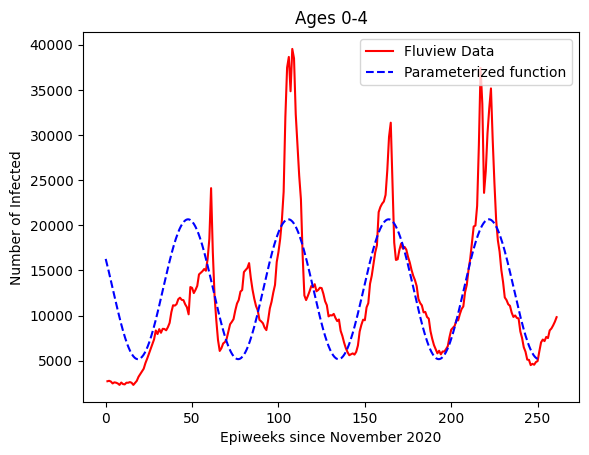

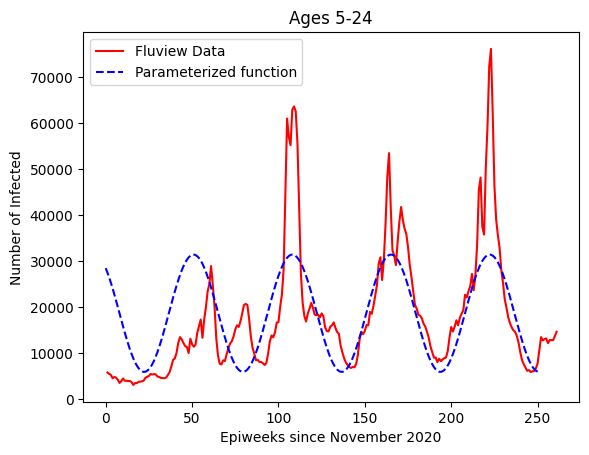

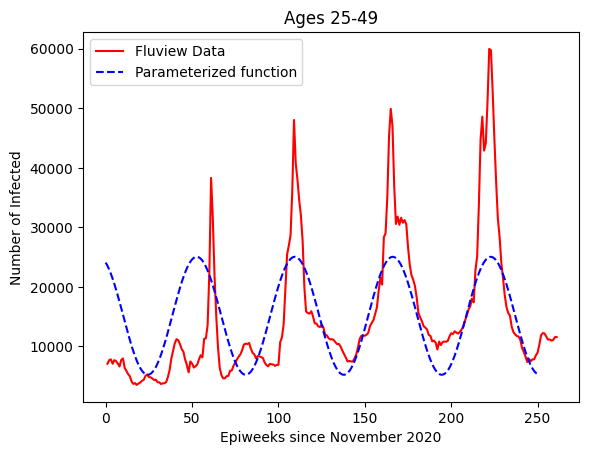

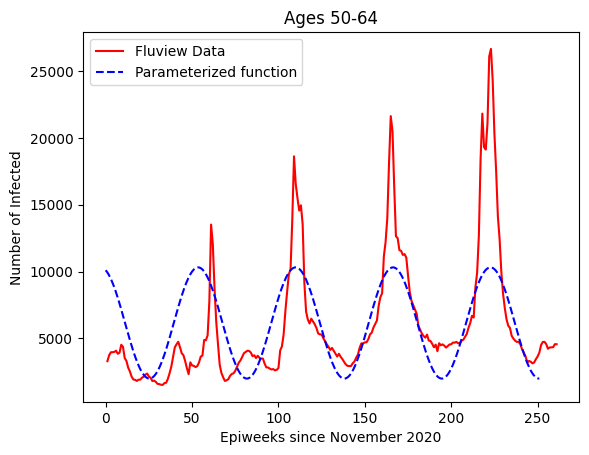

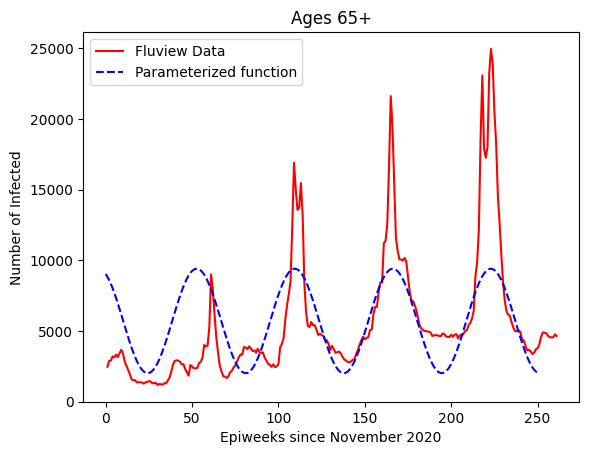

: 

In [ ]:
# to check the results we graph them against the original data
import matplotlib.pyplot as plt

# plotting age group 0 data and parameterized curve
t = np.linspace(0, 251, 600) 

plt.plot(x, ageGroup0, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params0[0], params0[1], params0[2], params0[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 0-4")
plt.show()

# plotting age group 1 data and parameterized curve
plt.plot(x, ageGroup1, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params1[0], params1[1], params1[2], params1[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 5-24")
plt.show()

# # plotting age group 2 data and parameterized curve
plt.plot(x, ageGroup2, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params2[0], params2[1], params2[2], params2[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 25-49")
plt.show()

# # plotting age group 3 data and parameterized curve
plt.plot(x, ageGroup3, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params3[0], params3[1], params3[2], params3[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 50-64")
plt.show()

# # plotting age group 4 data and parameterized curve
plt.plot(x, ageGroup4, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params4[0], params4[1], params4[2], params4[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 65+")
plt.show()

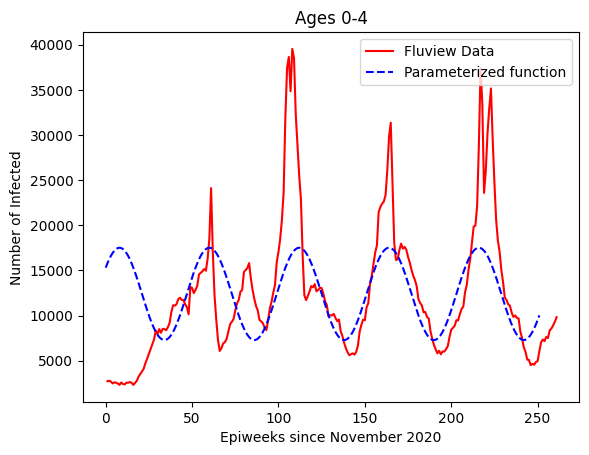

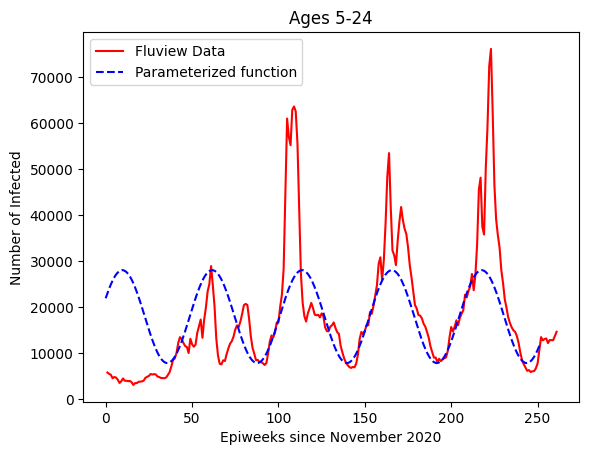

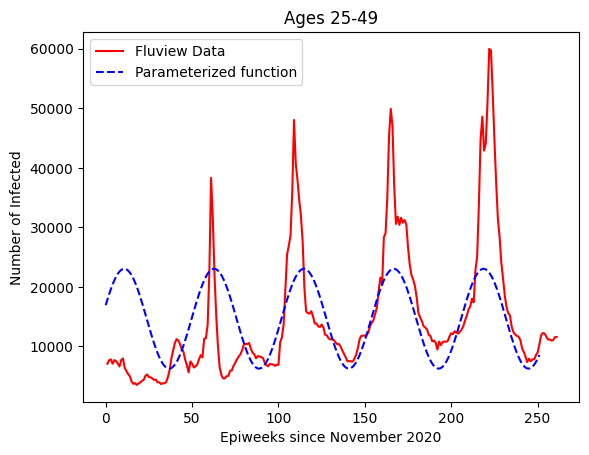

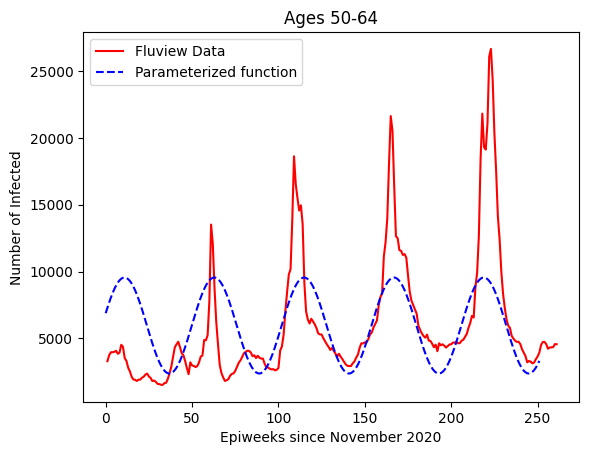

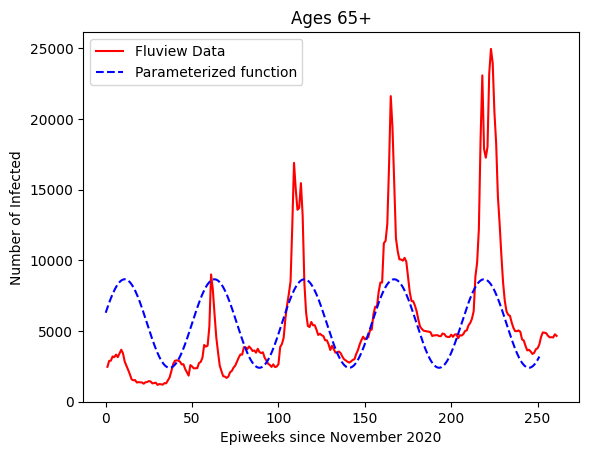

In [51]:
# to check the results we graph them against the original data
import matplotlib.pyplot as plt

# plotting age group 0 data and parameterized curve
t = np.linspace(0, 251, 600) 

plt.plot(x, ageGroup0, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params0[0], params0[1], params0[2]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 0-4")
plt.show()

# plotting age group 1 data and parameterized curve
plt.plot(x, ageGroup1, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params1[0], params1[1], params1[2]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 5-24")
plt.show()

# # plotting age group 2 data and parameterized curve
plt.plot(x, ageGroup2, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params2[0], params2[1], params2[2]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 25-49")
plt.show()

# # plotting age group 3 data and parameterized curve
plt.plot(x, ageGroup3, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params3[0], params3[1], params3[2]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 50-64")
plt.show()

# # plotting age group 4 data and parameterized curve
plt.plot(x, ageGroup4, color="red", label="Fluview Data")
plt.plot(t, betaFunc(t, params4[0], params4[1], params4[2]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 65+")
plt.show()

In [47]:
# trying a different type of equation
def incBetaFunc(t, a, b, c, d):
  return a*t * np.sin(b*t + c) + d*t# linear amplitude increase


# running scipy.optimize.curve_fit which uses non-linear least squares to fit a function to data
# we run this five separate times for the different age groups
x = np.arange(1, len(ageGroup0) + 1)

p0 = [40, 2*np.pi/52, 0, 90]

# age group 0
params0, pcov0 = scipy.optimize.curve_fit(incBetaFunc, x, ageGroup0, p0 = p0)
print(params0)

# age group 1
params1, pcov1 = scipy.optimize.curve_fit(incBetaFunc, x, ageGroup1, p0 = p0)

# age group 2
params2, pcov2 = scipy.optimize.curve_fit(incBetaFunc, x, ageGroup2, p0 = p0)

# age group 3
params3, pcov3 = scipy.optimize.curve_fit(incBetaFunc, x, ageGroup3, p0 = p0)

# age group 4
params4, pcov4 = scipy.optimize.curve_fit(incBetaFunc, x, ageGroup4, p0=p0)

[56.89628527  0.11213286  2.00889426 82.44914265]


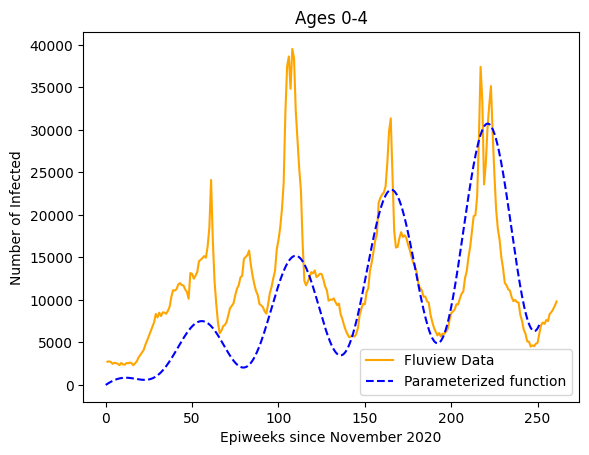

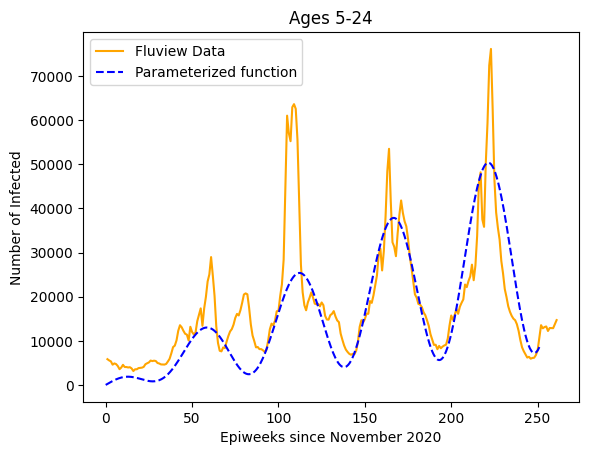

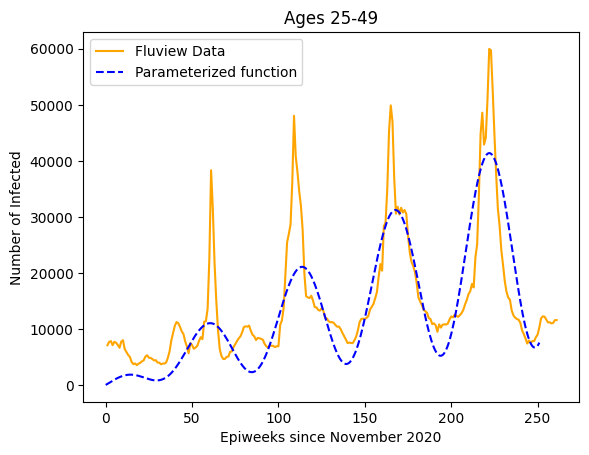

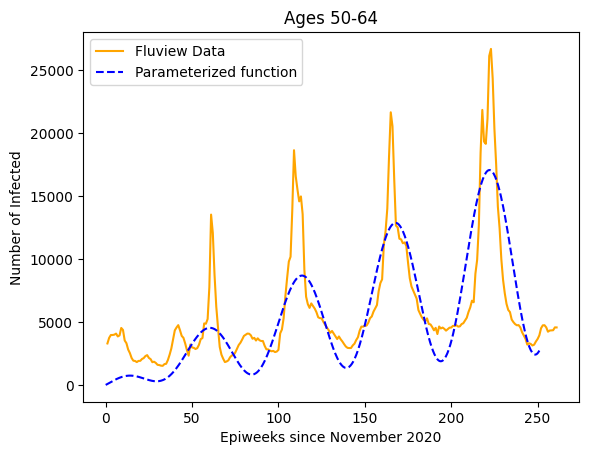

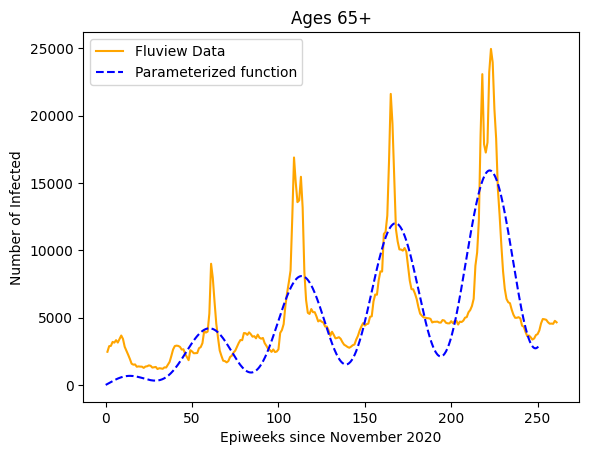

In [49]:
# to check the results we graph them against the original data
import matplotlib.pyplot as plt

# plotting age group 0 data and parameterized curve
t = np.linspace(0, 251, 600) 

plt.plot(x, ageGroup0, color="orange", label="Fluview Data")
plt.plot(t, incBetaFunc(t, params0[0], params0[1], params0[2], params0[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 0-4")
plt.show()

# plotting age group 1 data and parameterized curve
plt.plot(x, ageGroup1, color="orange", label="Fluview Data")
plt.plot(t, incBetaFunc(t, params1[0], params1[1], params1[2], params1[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 5-24")
plt.show()

# # plotting age group 2 data and parameterized curve
plt.plot(x, ageGroup2, color="orange", label="Fluview Data")
plt.plot(t, incBetaFunc(t, params2[0], params2[1], params2[2], params2[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 25-49")
plt.show()

# # plotting age group 3 data and parameterized curve
plt.plot(x, ageGroup3, color="orange", label="Fluview Data")
plt.plot(t, incBetaFunc(t, params3[0], params3[1], params3[2], params3[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 50-64")
plt.show()

# # plotting age group 4 data and parameterized curve
plt.plot(x, ageGroup4, color="orange", label="Fluview Data")
plt.plot(t, incBetaFunc(t, params4[0], params4[1], params4[2], params4[3]), ls='--', color="blue", label="Parameterized function")
plt.legend()
plt.xlabel("Epiweeks since November 2020")
plt.ylabel("Number of Infected")
plt.title("Ages 65+")
plt.show()

## Gaussian Pulse Equations

In [ ]:
# we will make a piecewise Gaussian, since Gaussian pulses can only cover one period

def gaussFunc(t, a, b, c, d):
  return a * np.exp(-((t-b)**2)/(2*(c**2))) + d

p0 = [20000, 54, 10, 7000]

# go year by year
